Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv


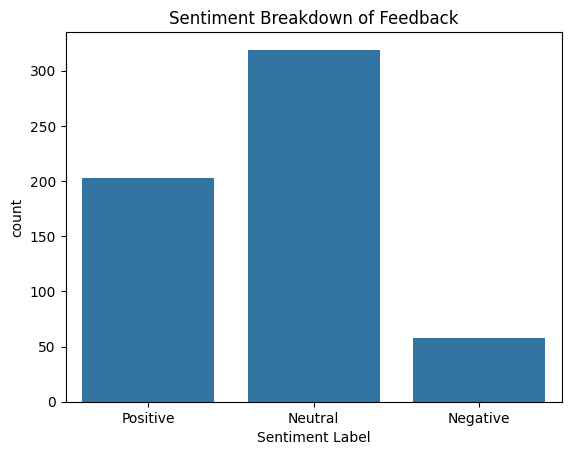

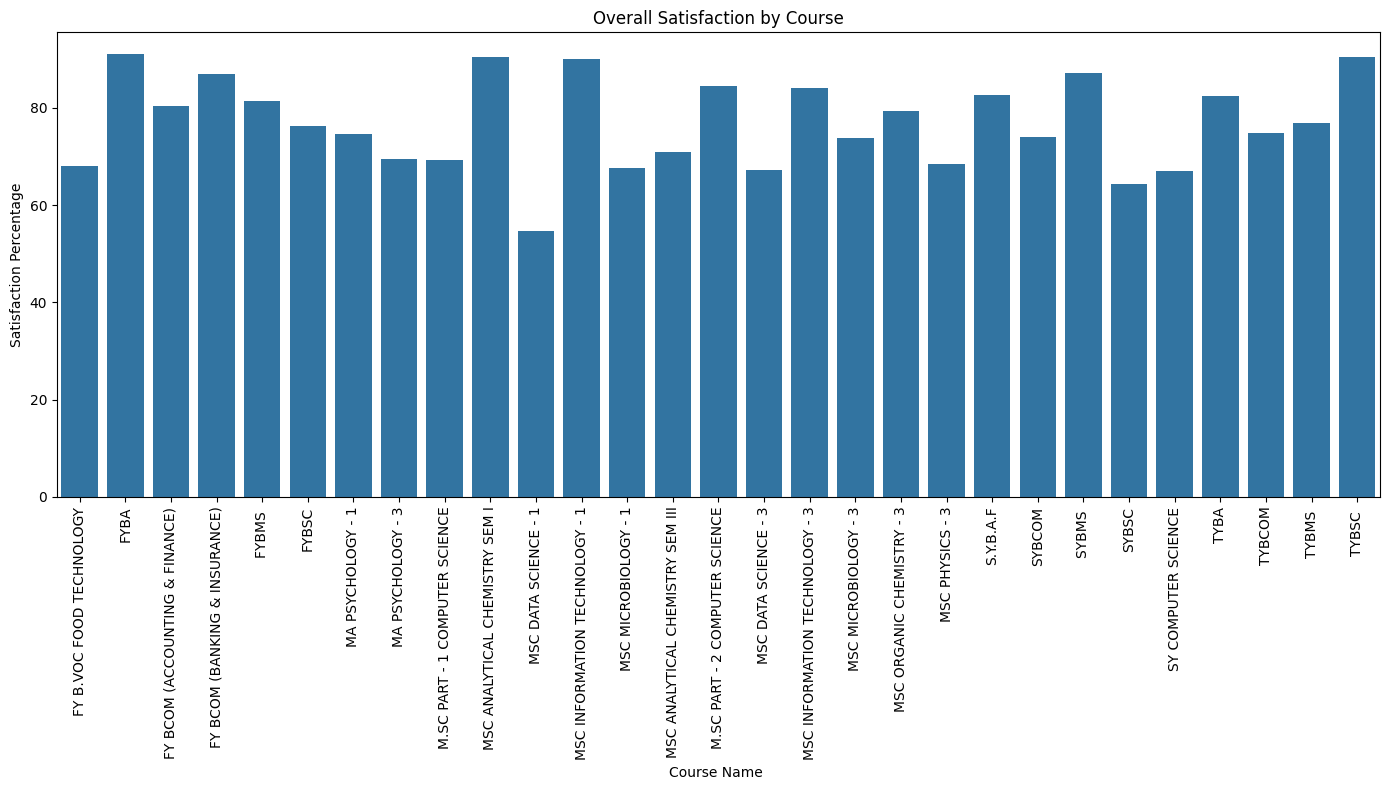

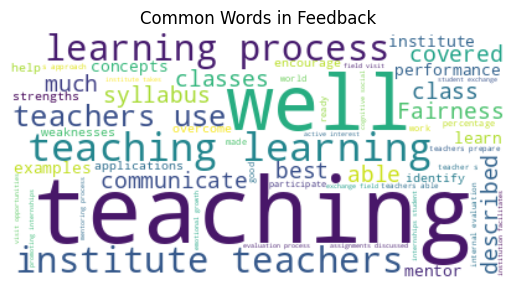

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv('Student_Satisfaction_Survey.csv', encoding='latin1')
df.head()
df = df[df['Questions'].notnull() & (df['Questions'] != "")]
df.reset_index(drop=True, inplace=True)
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment Score'] = df['Questions'].apply(get_sentiment)
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Label'] = df['Sentiment Score'].apply(label_sentiment)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Sentiment Label')
plt.title("Sentiment Breakdown of Feedback")
plt.show()


# Analysis 1: Overall Satisfaction by Course
plt.figure(figsize=(14, 8))
# Extract percentage from 'Average/ Percentage' column safely
def extract_percentage(value):
    try:
        return float(value.split('/')[1].strip())
    except (AttributeError, IndexError, ValueError):
        return np.nan

df['Percentage'] = df['Average/ Percentage'].apply(extract_percentage)

# Drop rows with missing percentage values
df = df.dropna(subset=['Percentage'])
sns.barplot(data=df, x='Course Name ', y='Percentage', errorbar=None)
plt.title('Overall Satisfaction by Course')
plt.xticks(rotation=90)
plt.ylabel('Satisfaction Percentage')
plt.tight_layout()
plt.show()
from wordcloud import WordCloud

all_words = ' '.join(df['Questions'])
wc = WordCloud(background_color='white').generate(all_words)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Feedback")
plt.show()